# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#adds api_key file path back into directories that pandas searches through to find api_keys

import sys
sys.path.append("..")

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | madalena
Processing Record 4 of Set 1 | malabar
Processing Record 5 of Set 1 | queenstown
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | warmbad
Processing Record 8 of Set 1 | bargara
City not found. Skipping...
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | stromstad
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | minot air force base
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | khovd
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1

City not found. Skipping...
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | sunch'on
City not found. Skipping...
Processing Record 42 of Set 4 | hanzhong
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | shache
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | fale old settlement
Processing Record 48 of Set 4 | revda
Processing Record 49 of Set 4 | san luis de la loma
Processing Record 0 of Set 5 | vadso
Processing Record 1 of Set 5 | kamaishi
Processing Record 2 of Set 5 | harper
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | san juan
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | arvayheer
Processing Record 8 of Set 5 | waiuku
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | las tablas
Processing Record 11 of Set 5 | tazovsky
Processing Record 12 of Set 5 

Processing Record 22 of Set 8 | sabha
Processing Record 23 of Set 8 | tvoroyri
Processing Record 24 of Set 8 | alibag
Processing Record 25 of Set 8 | stephenville
Processing Record 26 of Set 8 | kiunga
Processing Record 27 of Set 8 | jacksonville
Processing Record 28 of Set 8 | mandera
Processing Record 29 of Set 8 | taroa
Processing Record 30 of Set 8 | osakarovka
Processing Record 31 of Set 8 | hilo
Processing Record 32 of Set 8 | sinop
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | usinsk
Processing Record 35 of Set 8 | wynyard
Processing Record 36 of Set 8 | pangai
Processing Record 37 of Set 8 | klaksvik
Processing Record 38 of Set 8 | lautoka
Processing Record 39 of Set 8 | huarmey
Processing Record 40 of Set 8 | booue
Processing Record 41 of Set 8 | yashkul'
Processing Record 42 of Set 8 | zvishavane
Processing Record 43 of Set 8 | shahba
Processing Record 44 of Set 8 | bikenibeu village
Processing Record 45 of Set 8 | midvagur
Processing Record 46 

City not found. Skipping...
Processing Record 9 of Set 12 | greenville
Processing Record 10 of Set 12 | amahai
Processing Record 11 of Set 12 | mineiros
Processing Record 12 of Set 12 | jeremoabo
Processing Record 13 of Set 12 | trujillo
Processing Record 14 of Set 12 | fisterra
Processing Record 15 of Set 12 | pokrovsk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          528
Lat           528
Lng           528
Max Temp      528
Humidity      528
Cloudiness    528
Wind Speed    528
Country       528
Date          528
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,301.82,31,0,7.72,MX,1683854422
1,adamstown,-25.0660,-130.1015,295.08,59,100,7.77,PN,1683854422
2,madalena,41.2162,-8.3345,286.74,70,2,2.10,PT,1683854423
3,malabar,-33.9667,151.2500,294.83,64,20,3.09,AU,1683854423
4,queenstown,-31.8976,26.8753,285.78,81,100,1.50,ZA,1683854423


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,301.82,31,0,7.72,MX,1683854422
1,adamstown,-25.0660,-130.1015,295.08,59,100,7.77,PN,1683854422
2,madalena,41.2162,-8.3345,286.74,70,2,2.10,PT,1683854423
3,malabar,-33.9667,151.2500,294.83,64,20,3.09,AU,1683854423
4,queenstown,-31.8976,26.8753,285.78,81,100,1.50,ZA,1683854423


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

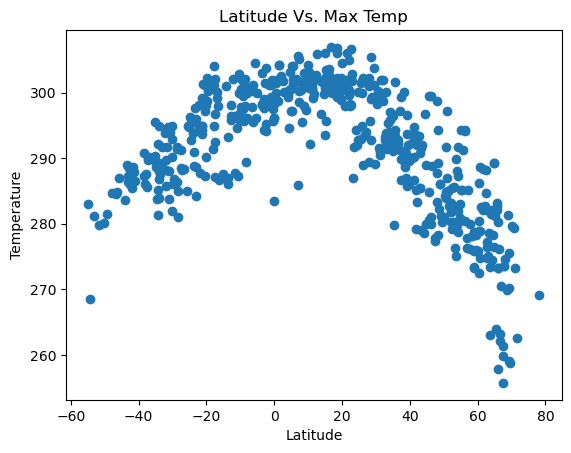

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
plt.title("Latitude Vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
# Incorporate the other graph properties



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

plt.show()


#### Latitude Vs. Humidity

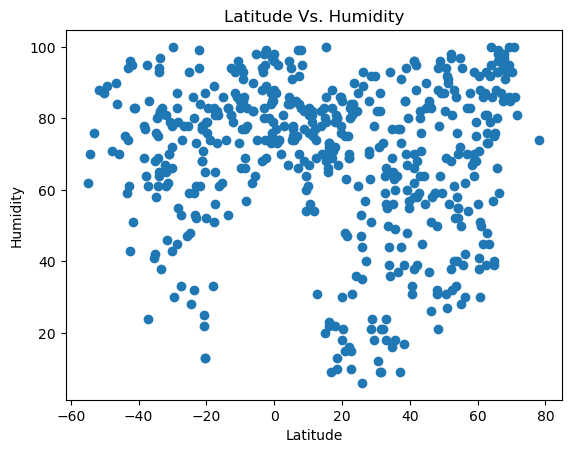

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot

plt.show()


#### Latitude Vs. Cloudiness

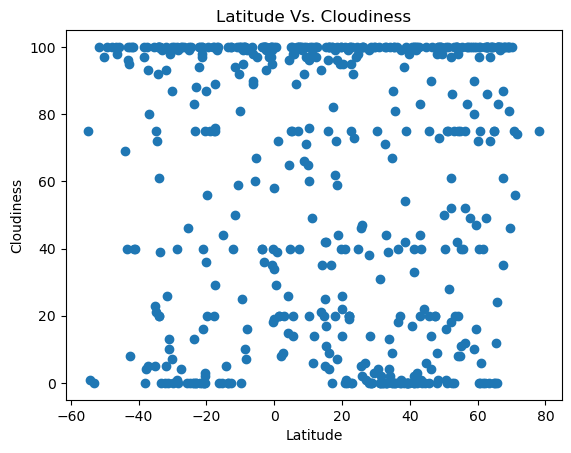

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])


# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

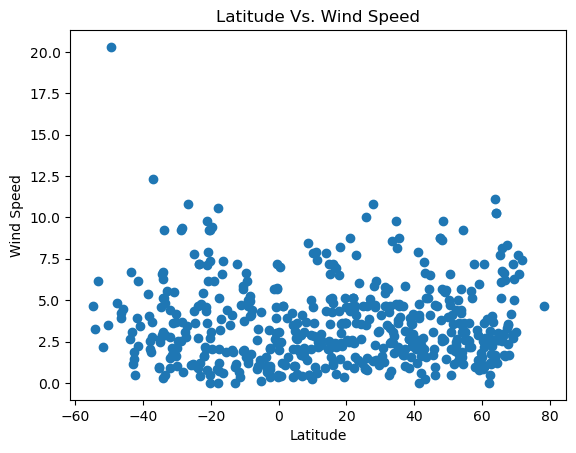

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])


# Incorporate the other graph properties

plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    slope, intercept, r, p, se = linregress(x, y)
    reg_val = x*slope + intercept
    plt.plot(x,reg_val,"r-")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,301.82,31,0,7.72,MX,1683854422
2,madalena,41.2162,-8.3345,286.74,70,2,2.10,PT,1683854423
5,tiksi,71.6872,128.8694,262.60,81,74,7.40,RU,1683854423
9,longyearbyen,78.2186,15.6401,269.06,74,75,4.63,SJ,1683854169
11,minot air force base,48.4209,-101.3391,289.20,94,100,9.77,US,1683854427


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,295.08,59,100,7.77,PN,1683854422
3,malabar,-33.9667,151.2500,294.83,64,20,3.09,AU,1683854423
4,queenstown,-31.8976,26.8753,285.78,81,100,1.50,ZA,1683854423
6,warmbad,-28.4500,18.7333,284.99,79,99,3.70,NaN,1683854424
7,papatowai,-46.5619,169.4708,284.48,90,100,4.21,NZ,1683854424


###  Temperature vs. Latitude Linear Regression Plot

The r value is :-0.8427309178219001


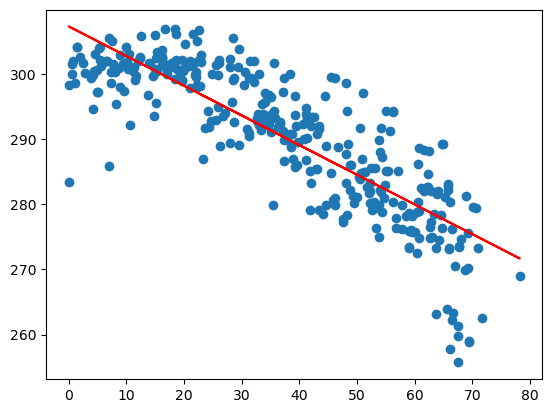

y = -0.46x + 307.32


In [107]:
# Linear regression on Northern Hemisphere


print(f'The r value is :{st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])[0]}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()



The r value is :0.749641689319102


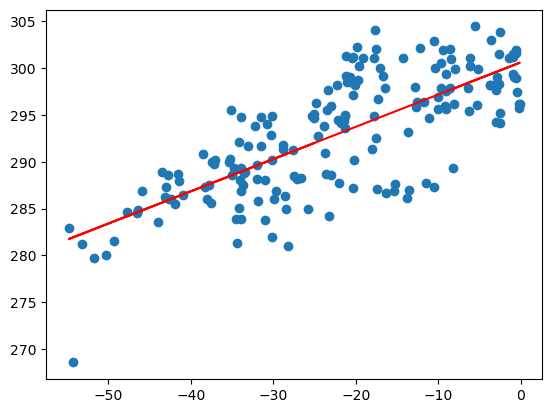

y = 0.34x + 300.62


In [106]:
# Linear regression on Southern Hemisphere
print(f'The r value is :{st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])[0]}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])


p_slope, p_int, p_r, p_p, p_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')

# Show the plot
plt.show()

**Discussion about the linear relationship:** Both the max temperature data for the northern and southern hemisphere are highly correlated to latitude. As you look farther north in latitude, the max_temp decreases, and as you go farther south, the max_temp increases.

### Humidity vs. Latitude Linear Regression Plot

The r value is :0.06569460085977144


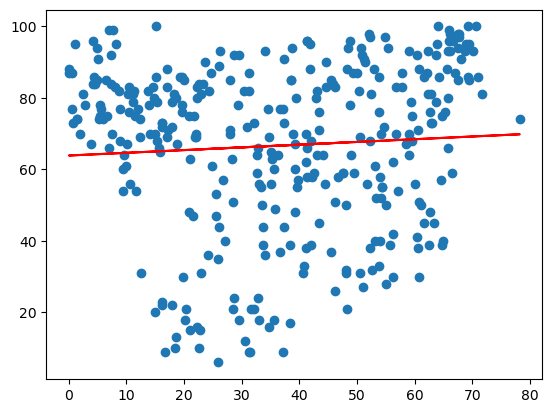

y = 0.08x + 63.89


In [105]:
# Northern Hemisphere
print(f'The r value is :{st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])[0]}')

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

p_slope, p_int, p_r, p_p, p_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()

The r value is :0.21874247534331673


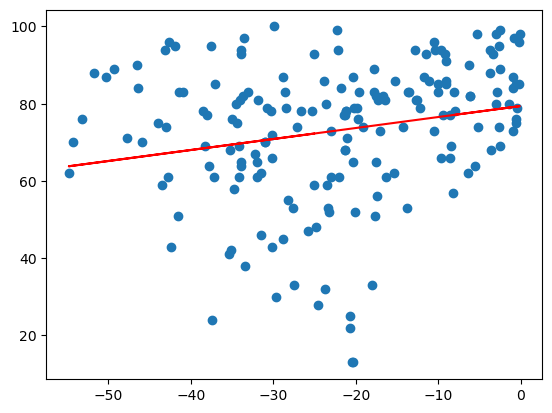

y = 0.28x + 79.4


In [104]:
# Southern Hemisphere
print(f'The r value is :{st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])[0]}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
reg_line =linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between humidity and latitude for both the northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is :0.07082358454010301


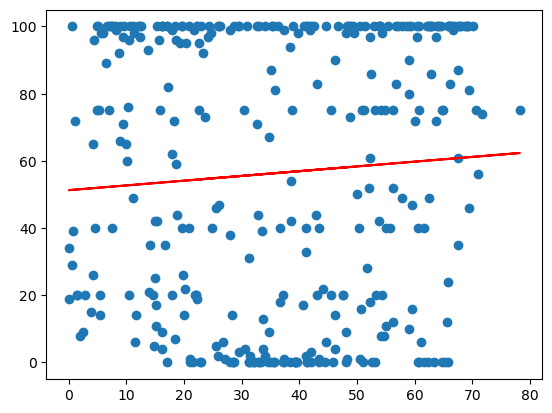

y = 0.14x + 51.28


In [108]:
# Northern Hemisphere
print(f'The r value is :{st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])[0]}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()

The r value is :0.09790449610962237


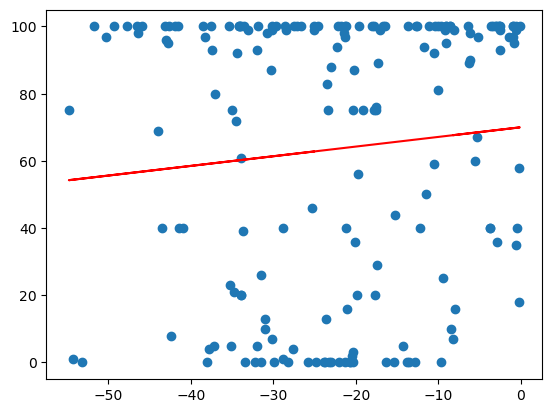

y = 0.29x + 70.0


In [109]:
# Southern Hemisphere
print(f'The r value is :{st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])[0]}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
reg_line =linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()

**Discussion about the linear relationship:** For the plots of humidity versus latitude, there is even less of a correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is :0.09853285057290966


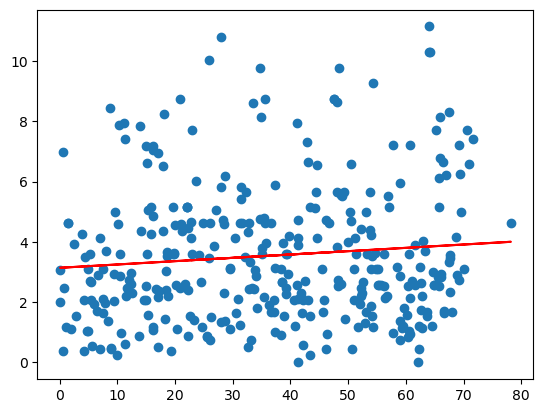

y = 0.01x + 3.14


In [116]:
# Northern Hemisphere
print(f'The r value is :{st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])[0]}')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()

The r value is :-0.18500550143675398


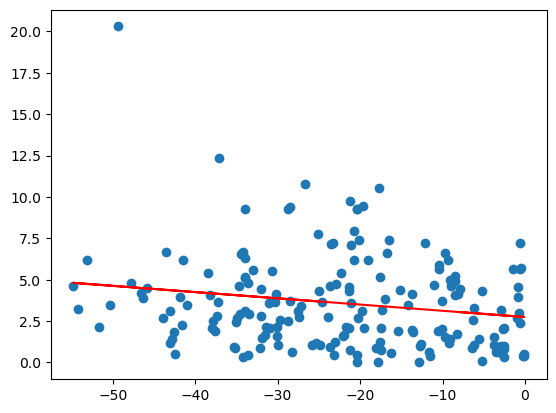

y = -0.04x + 2.75


In [117]:
# Southern Hemisphere
print(f'The r value is :{st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])[0]}')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
reg_line =linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(f'y = {round(p_slope,2)}x + {round(p_int,2)}')
plt.show()

**Discussion about the linear relationship:** These two variables are slightly more correlated than cloudiness, similar to plot and correlation of latitude to humidity.